In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
metroData = pd.read_csv('capmetro_UT.csv')

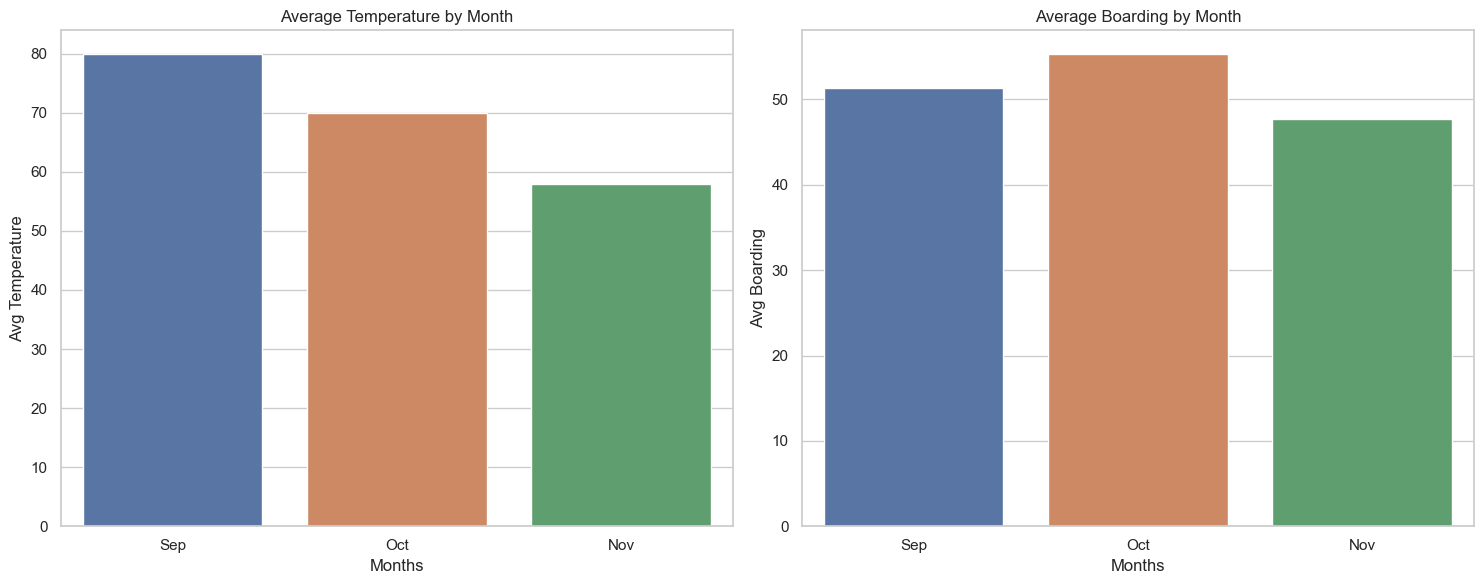

In [55]:
# Group and calculate mean values
by_monthly_temp = metroData.groupby('month').agg(
    count=pd.NamedAgg(column='month', aggfunc='size'),
    mean_boarding=pd.NamedAgg(column='boarding', aggfunc='mean'),
    mean_temperature=pd.NamedAgg(column='temperature', aggfunc='mean')
).reset_index()

# Define order of months
months_order = ["Sep", "Oct", "Nov"]

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Bar plot for Avg Temperature
plt.subplot(1, 2, 1)
sns.barplot(data=by_monthly_temp, x='month', y='mean_temperature', order=months_order)
plt.xlabel("Months")
plt.ylabel("Avg Temperature")
plt.title("Average Temperature by Month")

# Bar plot for Avg Boarding
plt.subplot(1, 2, 2)
sns.barplot(data=by_monthly_temp, x='month', y='mean_boarding', order=months_order)
plt.xlabel("Months")
plt.ylabel("Avg Boarding")
plt.title("Average Boarding by Month")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Bar plot of average boarding through the hour of day. The plot shows that more people board the Capital Metro transport system when the temperature is higher


Bar plot of average boarding through the months. The plot shows that even though the average temperature lowers from Sep to Oct and from Oct to Nov, the average number of people boarding the public transport system increases 11.4% (98,530 to 109,767 boardings) from Sep to Oct and lowers 16.45% (109,767 to 91,707) from Oct to Nov.


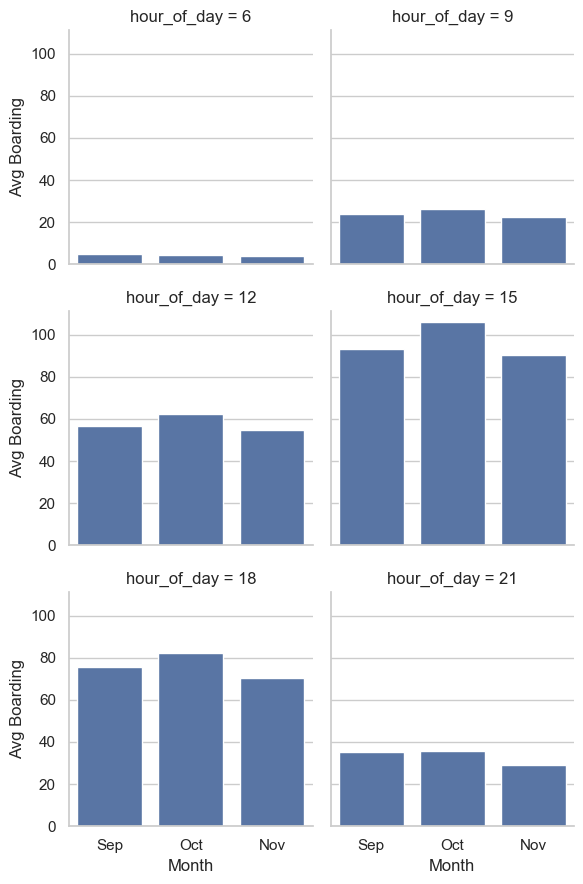

In [49]:
by_monthly_hourDay = metroData.groupby(['month', 'hour_of_day']).agg(
    count=pd.NamedAgg(column='hour_of_day', aggfunc='size'),
    mean_boarding=pd.NamedAgg(column='boarding', aggfunc='mean')
).reset_index()

by_monthly_hourDay = by_monthly_hourDay[
    by_monthly_hourDay['hour_of_day'].isin([6, 9, 12, 15, 18, 21])


g = sns.FacetGrid(by_monthly_hourDay, col="hour_of_day", col_wrap=2)
g.map(sns.barplot, "month", "mean_boarding", order=months_order)
g.set_axis_labels("Month", "Avg Boarding")
plt.show()

Average boarding through the hours of day in different months. Tha graphs show that in the afternoon(12-18, which is 12pm to 6pm) more people board the Capital Metro transport system and that early morning is when less people use the transport system.


<Figure size 1000x600 with 0 Axes>

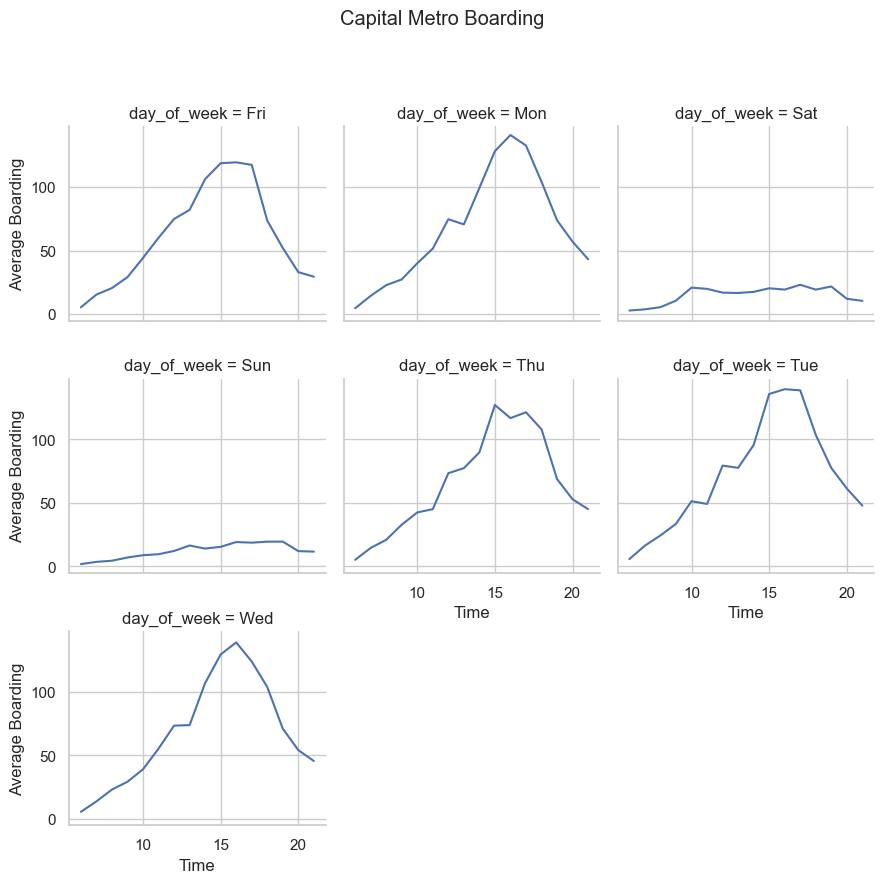

In [50]:
avg_boarding_every_hour = metroData.groupby(['hour_of_day', 'day_of_week']).agg(avgboarding=('boarding', 'mean')).reset_index().sort_values('day_of_week')

# Plotting average boarding
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set grid style
g = sns.FacetGrid(avg_boarding_every_hour, col='day_of_week', col_wrap=3)
g.map(sns.lineplot, 'hour_of_day', 'avgboarding')  
# Using sns.lineplot to create a curve
g.set_axis_labels("Time", "Average Boarding")
g.fig.suptitle("Capital Metro Boarding")
plt.subplots_adjust(top=0.85)
plt.show()

<Figure size 1000x600 with 0 Axes>

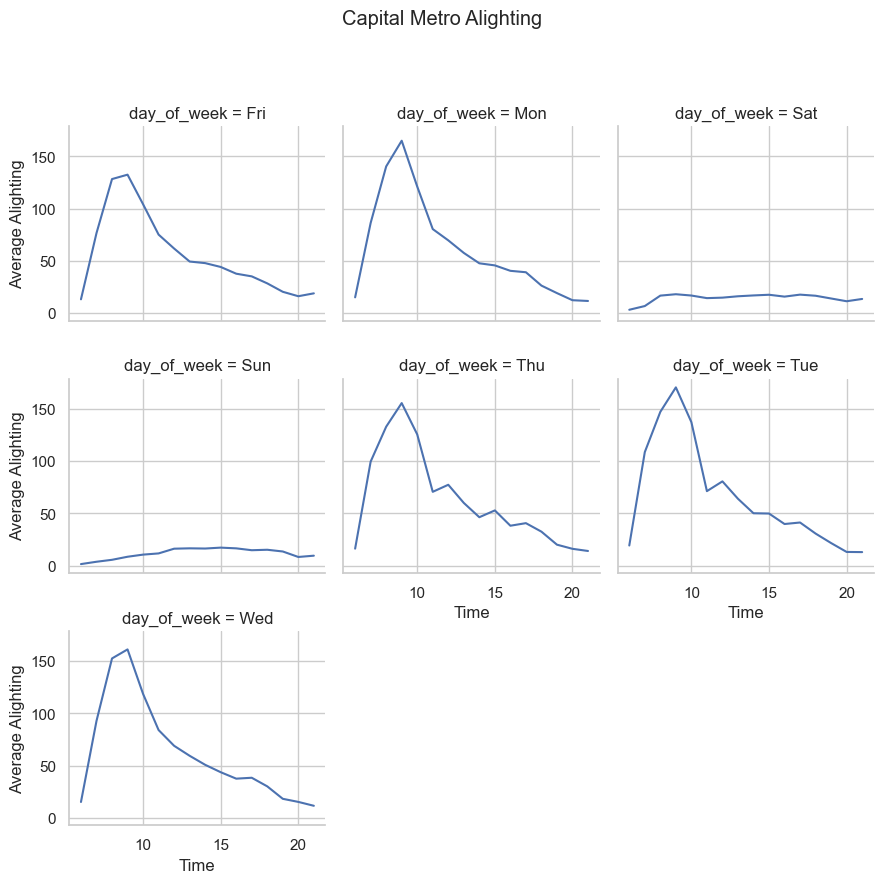

In [22]:
avg_alighting_every_hour = metroData.groupby(['hour_of_day', 'day_of_week']).agg(avg_alighting=('alighting', 'mean')).reset_index().sort_values('day_of_week')

# Plotting average alighting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set grid style
g = sns.FacetGrid(avg_alighting_every_hour, col='day_of_week', col_wrap=3)
g.map(sns.lineplot, 'hour_of_day', 'avg_alighting')  # Using sns.lineplot to create a curve
g.set_axis_labels("Time", "Average Alighting")
g.fig.suptitle("Capital Metro Alighting")
plt.subplots_adjust(top=0.85)
plt.show()

Weekday vs Weekend ride there is a clear difference between weekday and weekend ridership. Weekdays (Monday to Friday) show higher boarding rates compared to weekends (Saturday and Sunday). This pattern is expected, as weekdays generally correspond to regular work and school days, leading to higher demand for public transportation.

On workdays (weekdays), we observe a consistent rise in boarding after 6 AM, reaching its peak between 3 PM and 4 PM. However, during weekends, boarding remains notably lower. Similarly, alighting sees its lowest levels on weekends, while it reaches a peak around 8 AM to 9 AM on weekdays.

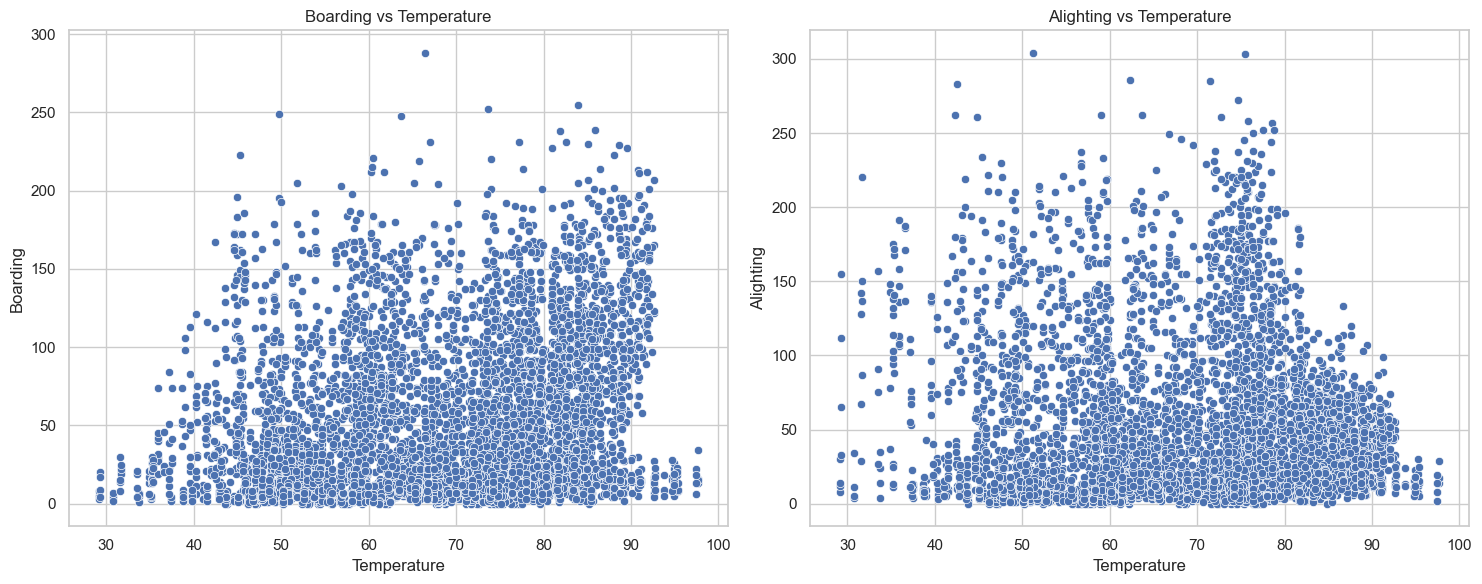

In [19]:
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Scatter plot for Boarding vs Temperature
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.scatterplot(data=metroData, x='temperature', y='boarding')
plt.title("Boarding vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Boarding")

# Scatter plot for Alighting vs Temperature
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.scatterplot(data=metroData, x='temperature', y='alighting')
plt.title("Alighting vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Alighting")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


By looking at the scatterplot showing the relationship between temperature and boarding/alighting, changes in temperature do not seem to consistently or significantly influence the patterns of boarding or alighting activity. 